# Madrid house price prediction

## 1. Contexto


## 2. Datos
Los datos se refieren a las viviendas de la ciudad de Madrid a lo largo de sus 21 distritosun 

### 2.1 Carga de datos

In [20]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [11]:
# Ajusta las opciones de visualización
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df= pd.read_csv('./data/dfEDA_final.csv',index_col=False)
#dfb= pd.read_csv('./dfEDA_final.csv',index_col=False)

C:\Users\extas\AppData\Local\Temp\ipykernel_15548\4230695949.py:1: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('./data/dfEDA_final.csv',index_col=False)


In [4]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Columns: 127 entries, Unnamed: 0 to total_estaciones
dtypes: float64(27), int64(87), object(13)
memory usage: 9.7+ MB


In [5]:
# Identifying the unique number of values in the dfset
df.nunique()

Unnamed: 0                  10009
url                         10009
m2_constr                     551
distrito                       21
cod_distrito                   21
                            ...  
tipo_fachada_ Piedra            2
tipo_fachada_Desconocido        2
euros_m2                     6142
precio_medio_barrio           131
total_estaciones               21
Length: 127, dtype: int64

### 2.2 Análisis de datos

C:\Users\extas\AppData\Local\Temp\ipykernel_15548\3746159673.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['precio'], kde=True, palette='Set1')


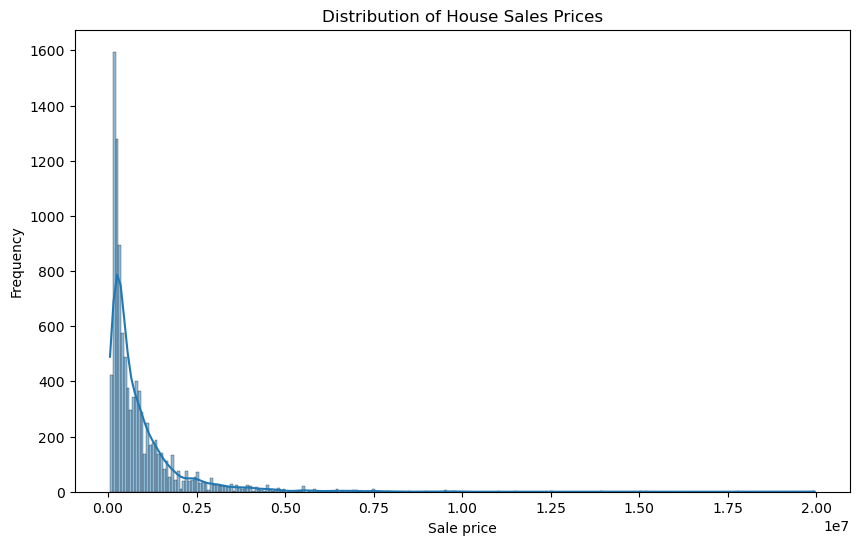

In [55]:
# View the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['precio'], kde=True, palette='Set1')
plt.title('Distribution of House Sales Prices')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Distribucion del precio por distrito

In [ ]:
def count_plot(df,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='barrio', data=df, order=df.barrio.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='barrio', data=df, order=df.barrio.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

In [6]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                  0
url                         0
m2_constr                   0
distrito                    0
cod_distrito                0
                           ..
tipo_fachada_ Piedra        0
tipo_fachada_Desconocido    0
euros_m2                    0
precio_medio_barrio         0
total_estaciones            0
Length: 127, dtype: int64

In [12]:
# Viewing the df statistics
df.describe().T

count      mean  \
Unnamed: 0                                       10009.00   5016.28   
m2_constr                                        10009.00    138.61   
cod_distrito                                     10009.00      7.77   
cod_barrio                                       10009.00     81.40   
letra_ce                                         10009.00      0.65   
amueblado                                        10009.00      0.08   
planta                                           10009.00      2.95   
dormitorios                                      10009.00      2.81   
banos                                            10009.00      2.03   
balcon                                           10009.00      0.08   
terraza                                          10009.00      0.19   
trastero                                         10009.00      0.13   
ascensor                                         10009.00      0.42   
tiene_armario                                    10009.00      0.19   
cancha_tenis                                     10009.00      0.00   
chimenea                                         10009.00      0.00   
exterior                                         10009.00      0.26   
interior                                         10009.00      0.00   
porton_electrico                                 10009.00      0.00   
videoportero                                     10009.00      0.03   
acceso_discapacidad                              10009.00      0.01   
precio                                           10009.00 890233.84   
armarios                                         10009.00      0.22   
codigo_postal                                    10009.00  28021.14   
m2_utiles                                        10009.00    112.40   
certificado_energetico                           10009.00      0.19   
puerta_seguridad                                 10009.00      0.01   
gastos_comunidad                                 10009.00      9.06   
portero                                          10009.00      0.02   
orientacion_este                                 10009.00      0.06   
orientacion_oeste                                10009.00      0.05   
orientacion_sur                                  10009.00      0.08   
orientacion_norte                                10009.00      0.03   
num_personas                                     10009.00     27.84   
num_personas_hombres                             10009.00     16.99   
num_personas_mujeres                             10009.00     19.08   
total_transacciones                              10009.00    324.06   
viv_nuevas_transacciones                         10009.00     36.25   
viv_usadas_transacciones                         10009.00    287.90   
lineas_metro                                     10009.00      4.95   
num_lineas_buses                                 10009.00    176.63   
renta neta media por persona                     10009.00     21.06   
renta neta media por hogar                       10009.00     49.80   
mediana de la renta por unidad de consumo        10009.00     24.74   
renta bruta media por persona                    10009.00     27.74   
renta bruta media por hogar                      10009.00     65.48   
habitantes                                       10009.00    164.89   
hogares                                          10009.00     68.81   
tamaño del hogar (nº de personas en la vivienda) 10009.00     24.35   
hog_con_1                                        10009.00     19.10   
hog_con_2                                        10009.00     11.24   
hog_con_3                                        10009.00      8.29   
hog_con_4                                        10009.00      3.21   
hog_con_5                                        10009.00    281.57   
hog_con_6                                        10009.00    425.68   
hog_con_7                                        10009.00    293.82   
hog_c

In [14]:
dfn = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación
corr = dfn.corr()

# Selecciona la fila correspondiente a 'precio'
corr_precio = corr.loc['precio']

print(corr_precio)

Unnamed: 0                                         -0.19
m2_constr                                           0.67
cod_distrito                                       -0.27
cod_barrio                                         -0.27
letra_ce                                            0.01
amueblado                                           0.08
planta                                             -0.01
dormitorios                                         0.44
banos                                               0.69
balcon                                              0.13
terraza                                             0.14
trastero                                            0.10
ascensor                                            0.10
tiene_armario                                       0.13
cancha_tenis                                        0.02
chimenea                                            0.11
exterior                                           -0.02
interior                       

<Axes: >

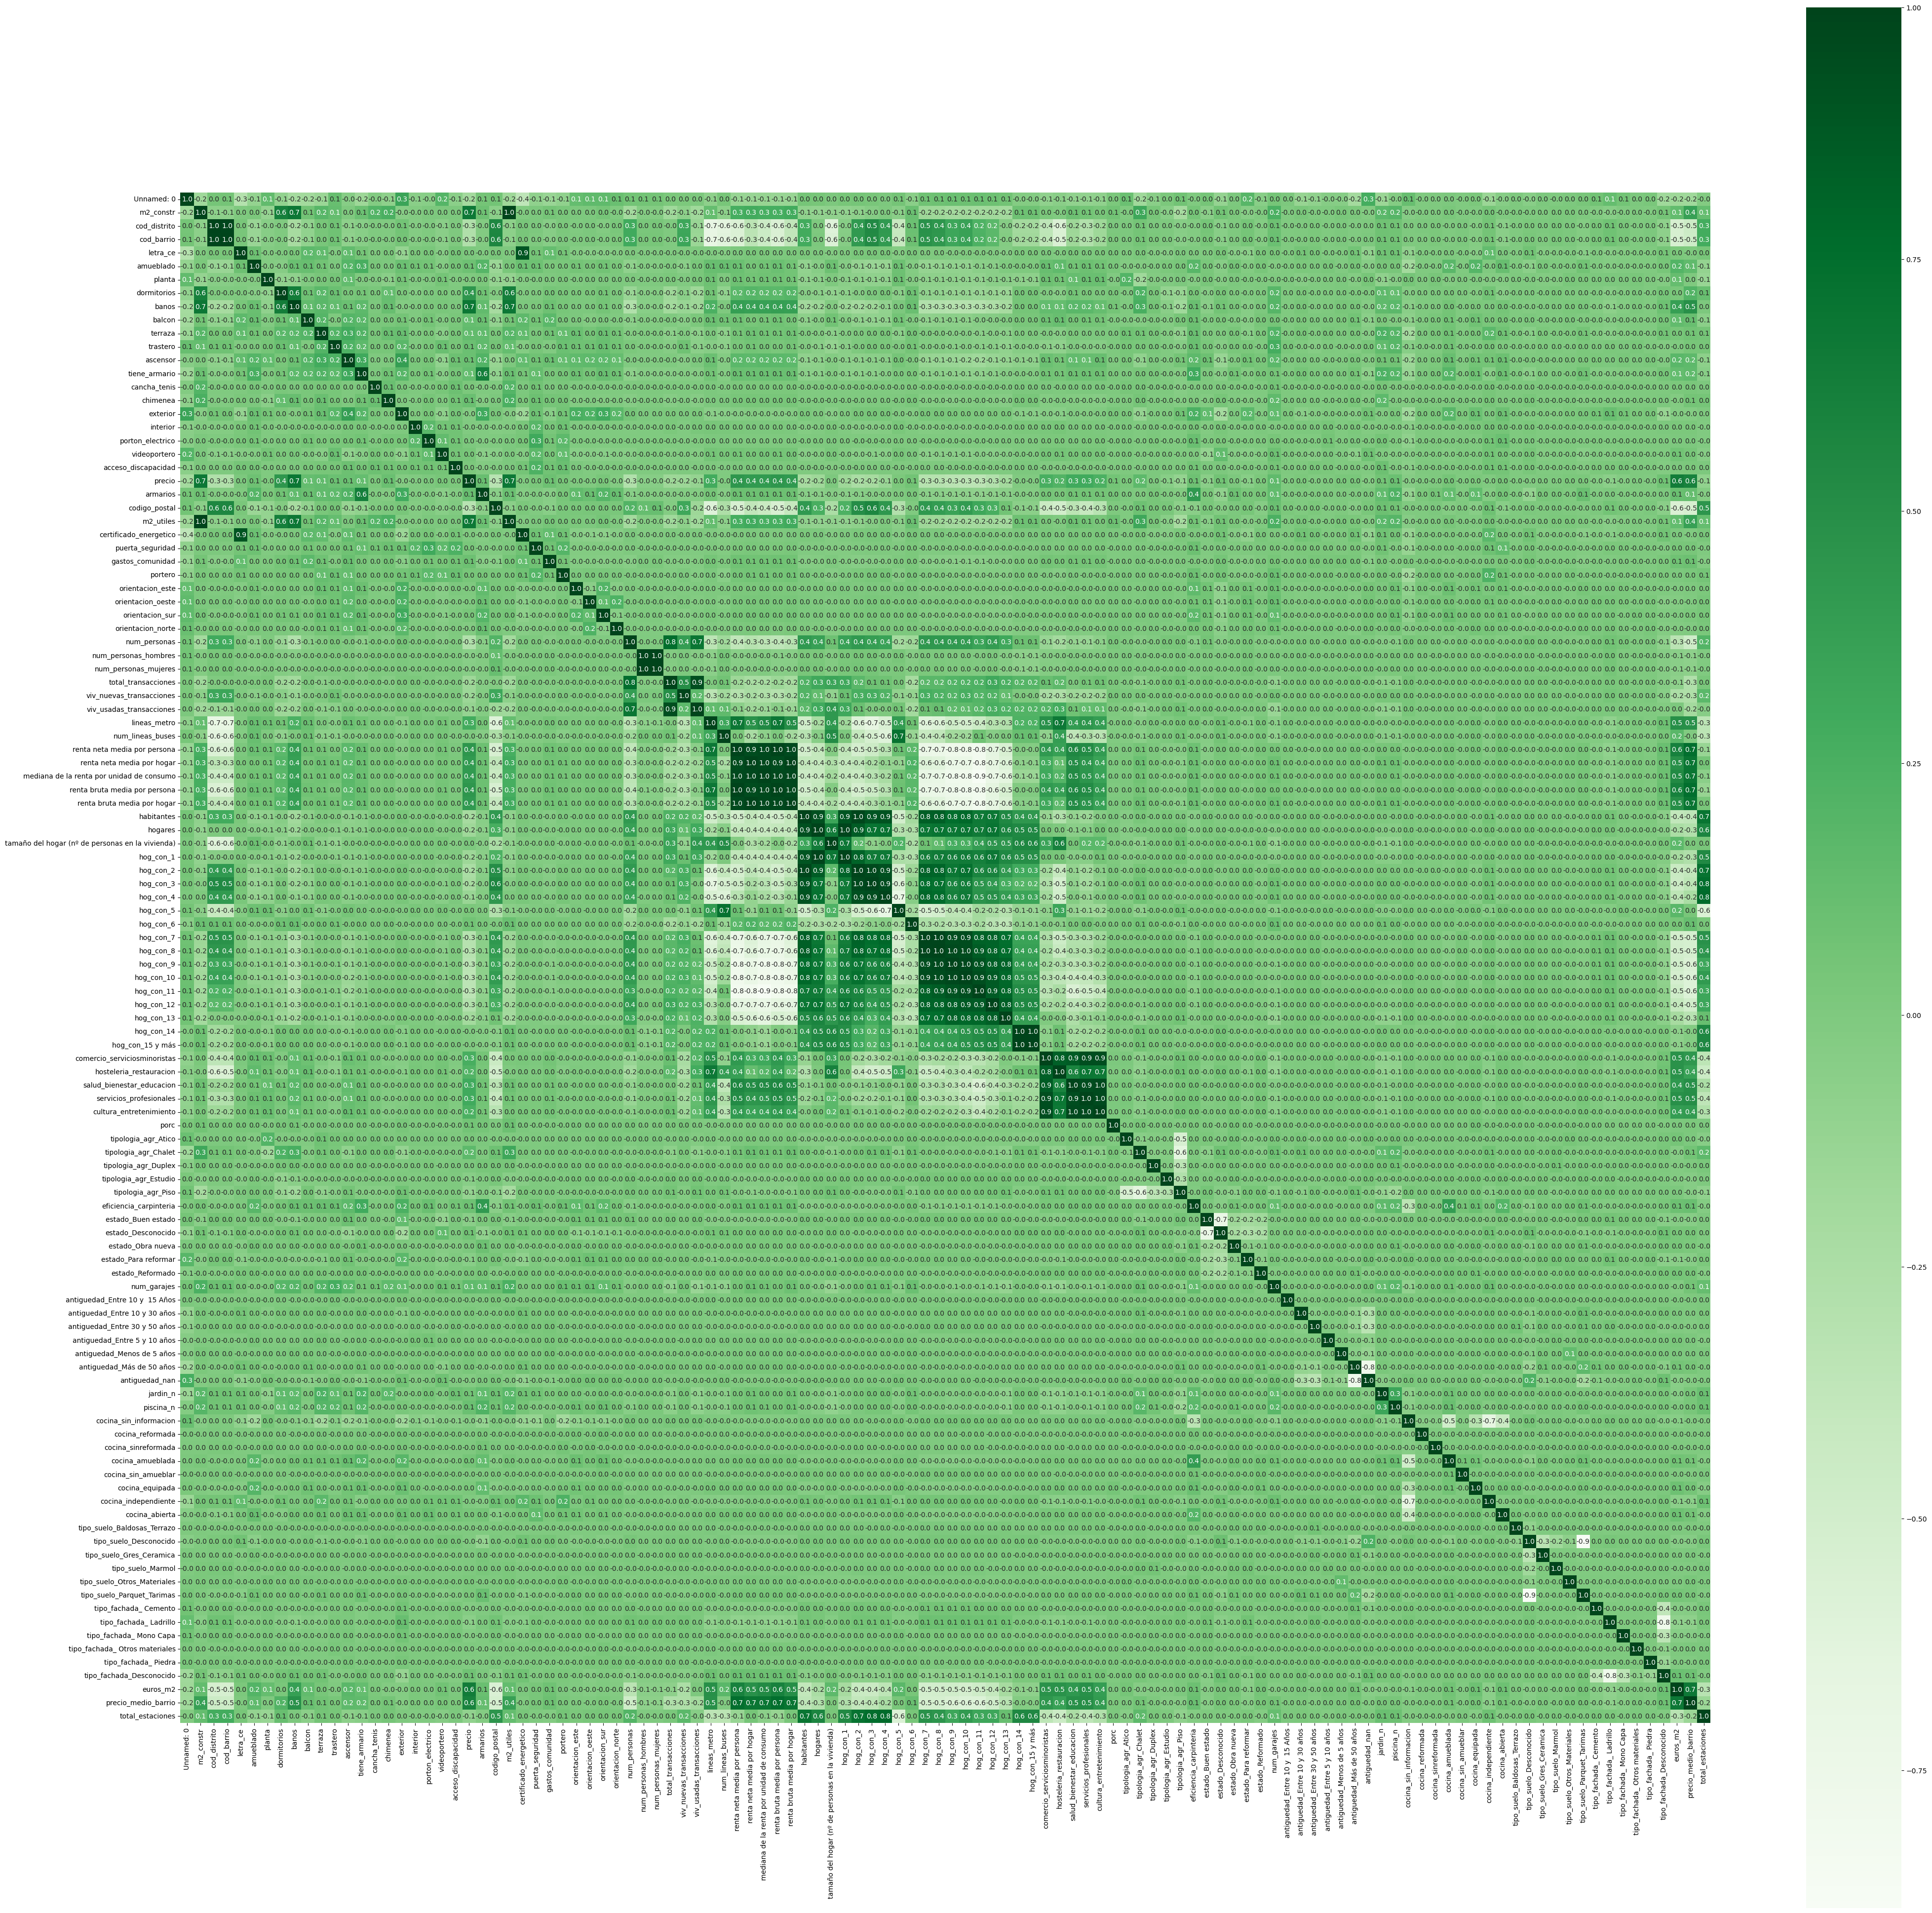

In [59]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(50,50))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

Identificación de Correlaciones Fuertes:

Correlaciones positivas fuertes (cercanas a 1):

m2_constr  (superficie construida de la vivienda) con precio (Precio de venta) tiene una correlación de 0.67, lo que indica que a mayor superficie, mayor precio de venta.

precio_medio_barrio (precio medio de las viviendas en el barrio) con precio tiene una correlación de 0.6, mostrando que cuanto mas caro son los precios medios del barrio mas cara será la vivienda..

Correlaciones negativas fuertes (cercanas a -1):

las variables hog_con_7  , hog_con_8,hog_con_9,hog_con_10,hog_con_11,hog_con_12 tienen correlaciones    -0.31,-0.31, -0.33, -0.35, -0.35, -0.29 respectivamente, lo que indica que cuando mas grandes sean los hogares del distrito mas baratas son las viviendas.

Correlaciones cercanas a 0
las variables tipo_suelo_Gres_Ceramica y tipo_suelo_Marmol tenen correlacion 0 con el precio por lo que podemos decir queese tipo de suelo no influye en el precio de la vivienda.

Revisar #########  Relaciones entre varaibles ¿?
Correlations between explanatory variables are also important to avoid multicollinearity in regression models. For example, GarageCars and GarageArea have a very high correlation (0.88), which can cause problems if both are included as independent variables in the same model.

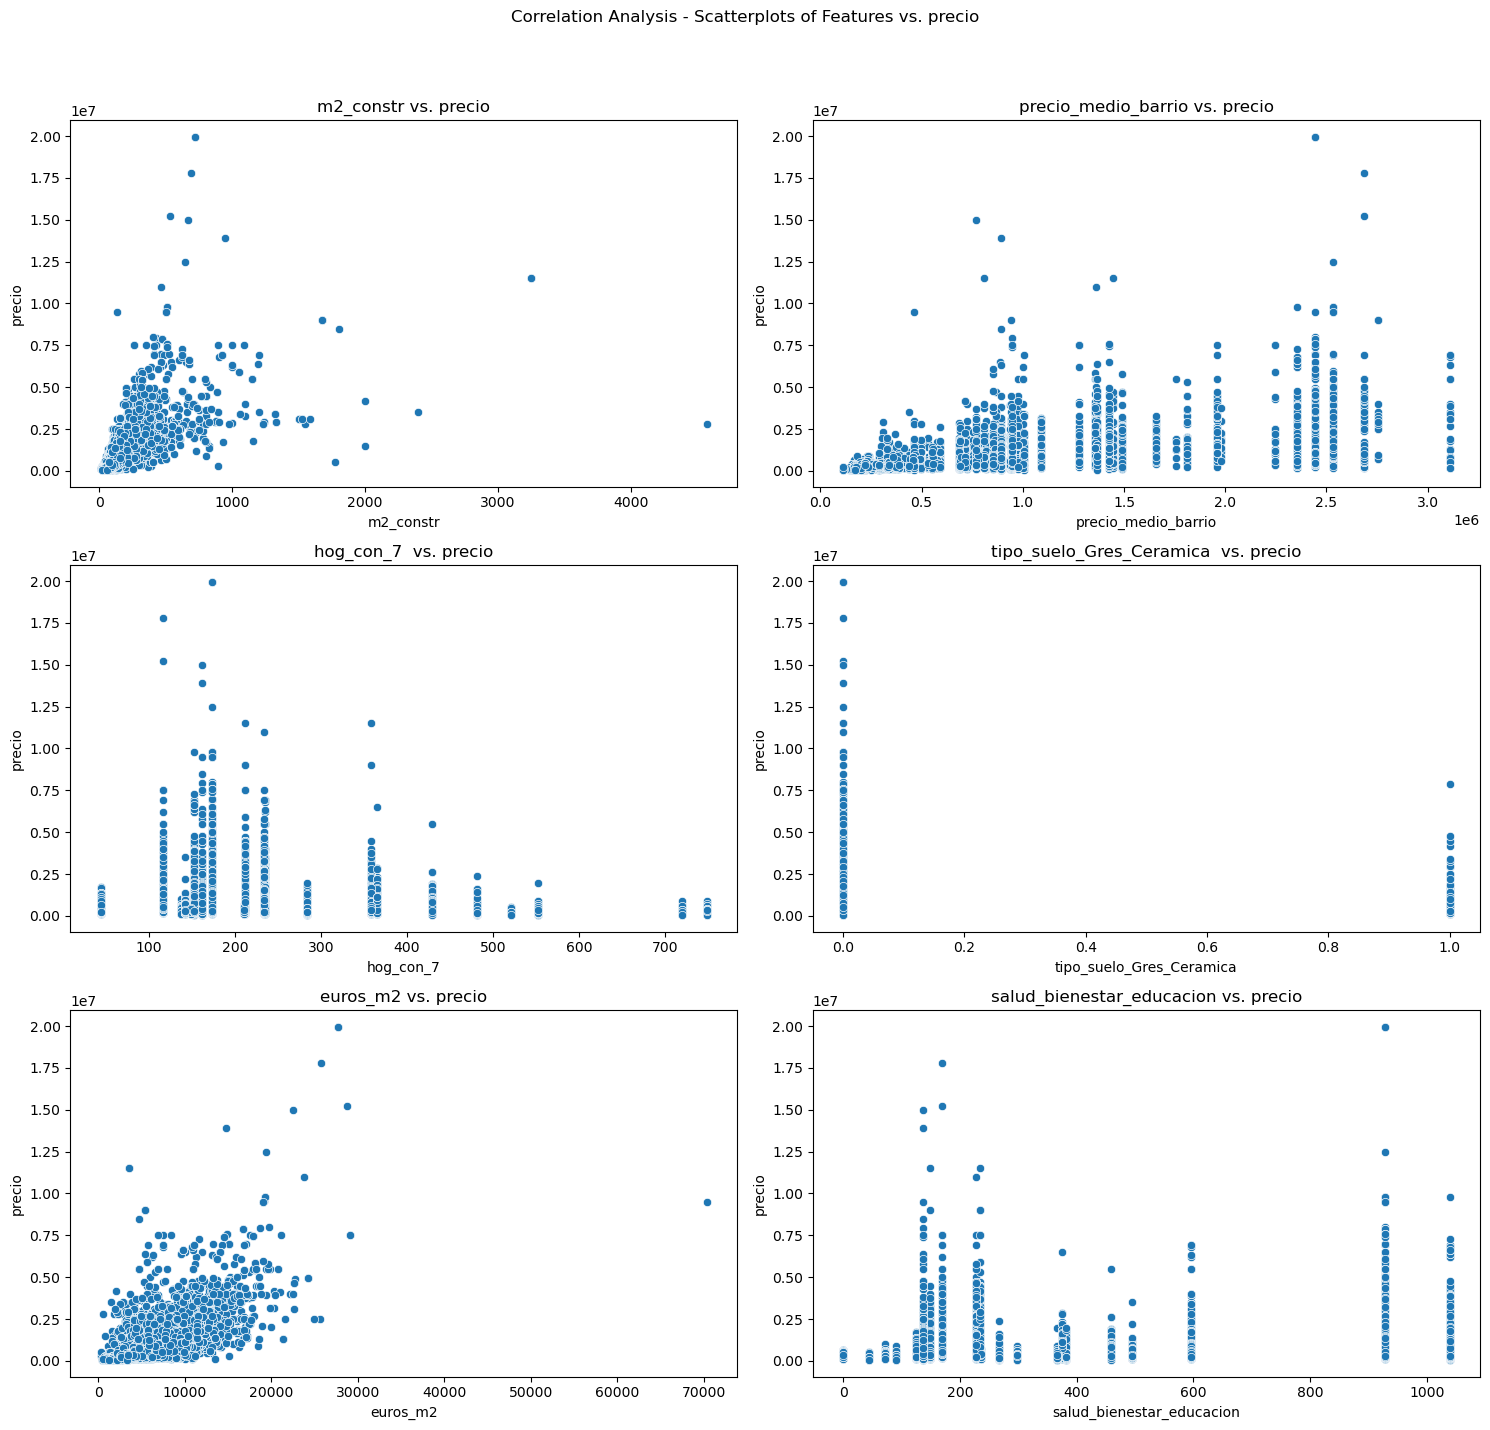

In [62]:
 #Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Correlation Analysis - Scatterplots of Features vs. precio')

sns.scatterplot(ax=axes[0, 0], x='m2_constr', y='precio', data=df)
axes[0, 0].set_title('m2_constr vs. precio')

sns.scatterplot(ax=axes[0, 1], x='precio_medio_barrio', y='precio', data=df)
axes[0, 1].set_title('precio_medio_barrio vs. precio')

sns.scatterplot(ax=axes[1, 0], x='hog_con_7', y='precio', data=df)
axes[1, 0].set_title('hog_con_7  vs. precio')

sns.scatterplot(ax=axes[1, 1], x='tipo_suelo_Gres_Ceramica', y='precio', data=df)
axes[1, 1].set_title('tipo_suelo_Gres_Ceramica  vs. precio')

sns.scatterplot(ax=axes[2, 0], x='euros_m2', y='precio', data=df)
axes[2, 0].set_title('euros_m2 vs. precio')

sns.scatterplot(ax=axes[2, 1], x='salud_bienestar_educacion', y='precio', data=df)
axes[2, 1].set_title('salud_bienestar_educacion vs. precio')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

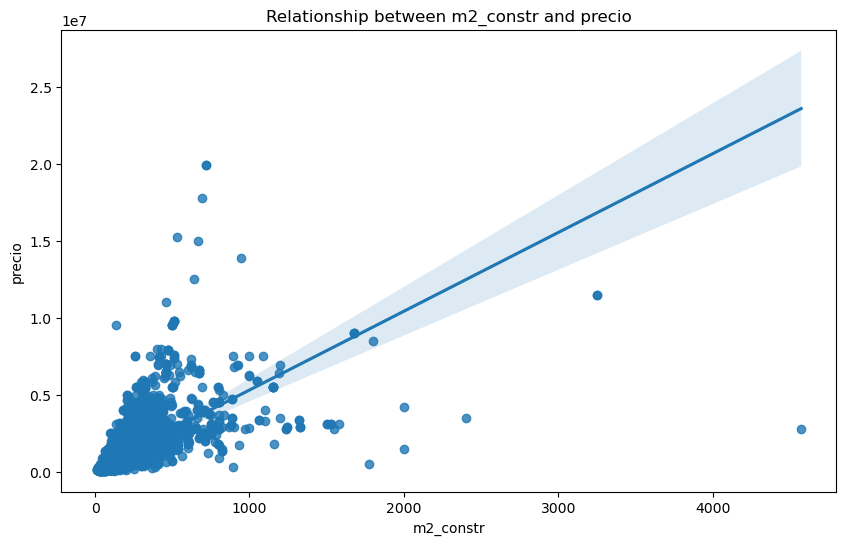

In [63]:
# Relationship between sales price and habitable area above ground (GrLivArea)
plt.figure(figsize=(10, 6))
sns.regplot(x="m2_constr", y="precio", data=df)
plt.title('Relationship between m2_constr and precio')
plt.xlabel('m2_constr')
plt.ylabel('precio')
plt.grid(False)
plt.show()

En este gráfico de regresión, podemos observar una correlación positiva entre las variables "m2_constr" (superficie construida) y "precio" (precio de venta de la vivienda). Esto significa que a medida que aumenta la superfie, el precio de venta de la vivienda también tiende a incrementarse. Esta relación es fundamental para entender cómo ciertas características de una propiedad influyen en su valor de mercado.

Además, al analizar el gráfico de regresión, podemos observar no solo la dirección de la correlación, sino también la fuerza y la forma de esa relación.

Como la línea de regresión tiene una pendiente pronunciada indica una correlación más fuerte entre las variables. 



In [ ]:
# Bar chart of average price by neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(data=df_price_by_neighborhood, x='barrio', y='PriceMean', ci=None, palette='Set2', estimator=np.mean, order=data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index)
plt.title('Average Sales Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [64]:
# Relationship between sales price and year of construction
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='antiguedad', y='precio', palette='Set2',estimator=np.median)
plt.title('Relationship between Sales Price and Year of Construction')
plt.xlabel('Construction Year')
plt.ylabel('Sales Price (Median)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

ValueError: Could not interpret value `antiguedad` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

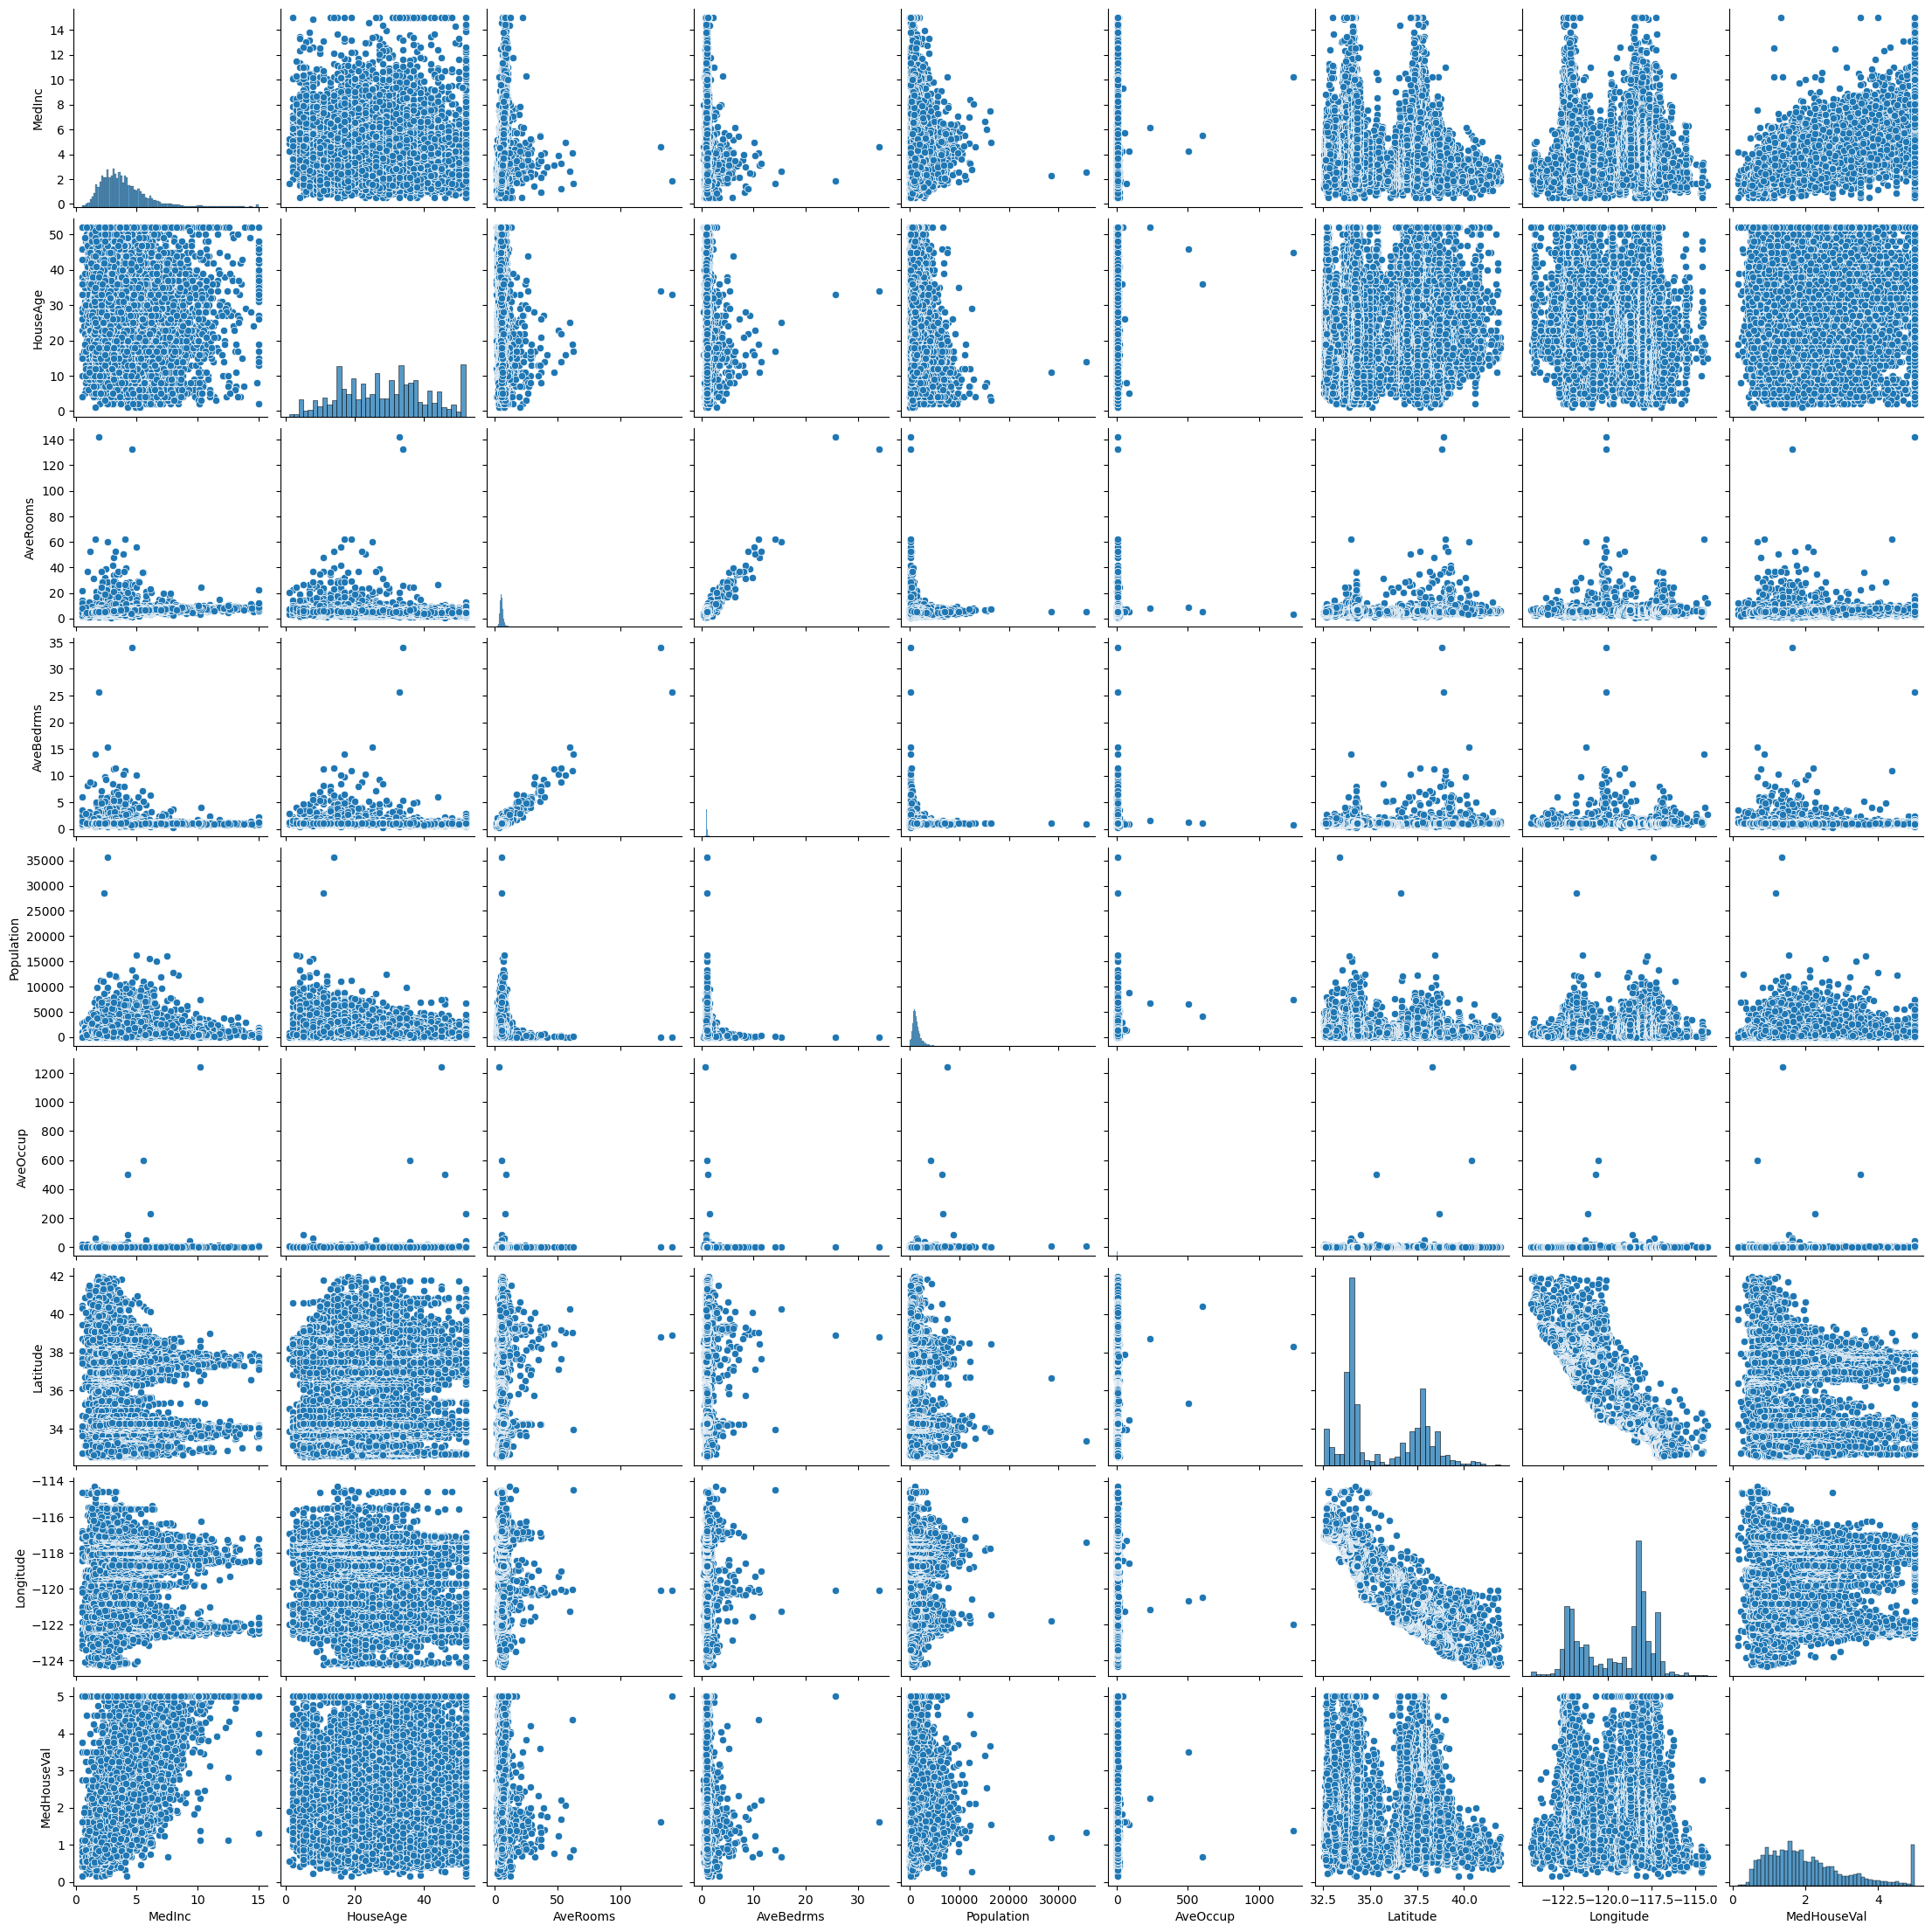

In [ ]:
#demasiadas variables para hacer esto
# Scatter plots between all features
#import warnings
#warnings.filterwarnings("ignore")  

#sns.pairplot(data=df)

### 2.3 Partición en train / test

In [19]:
# Guardamos la  variable target en una variable "target"
target = 'precio'
df[target].head()

0    2000000
1     650000
2     650000
3     599999
4     625000
Name: precio, dtype: int64

In [24]:
#dfbaseline=df
# Dividir las columnas objetivo y características, preservando nombres de columnas
dfn["url"] = df["url"]
dfmodel=dfn
y = dfmodel[target].values
X = dfmodel.drop(columns=[target, 'url'])

df_ids = dfmodel[['url']]

# Primera clasificación entre train y test
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, df_ids, test_size=0.3, random_state=42)

#Segunda división: Train y Validación a partir de X_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Número de registros del dataset de train y de test
print("Número de observaciones")
print("- Train: ", X_train.shape[0])
print("- Test:  ", X_test.shape[0])
print("- Val:  ", X_val.shape[0])

dftrain = X_train.reset_index(drop=True)
dftest = X_test.reset_index(drop=True)
dfval = X_val.reset_index(drop=True)



Número de observaciones
- Train:  5604
- Test:   3003
- Val:   1402


## 4. Random Forest Regressor 

### 4.1 Entrenamiento del modelo

In [25]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

### 4.2 Evaluación sobre train

In [26]:
# Model prediction on train df
y_pred = reg.predict(X_train)

In [27]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9950178138338465
MAE: 11447.39392219843
MSE: 6950076262.383682
RMSE: 83367.11739279272


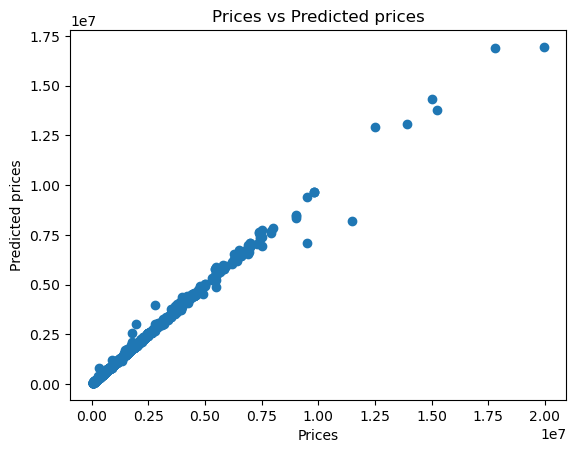

In [28]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

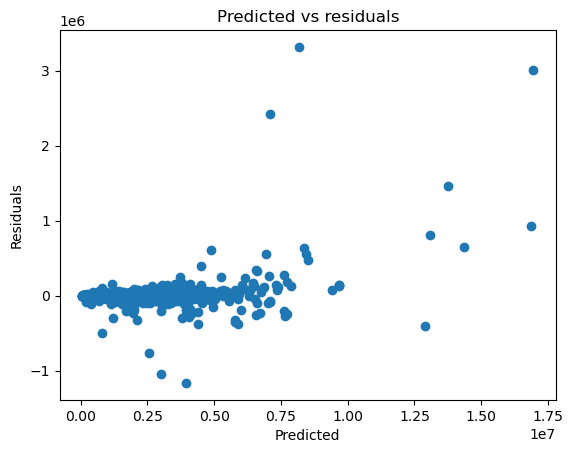

In [29]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### 4.3 Evaluación sobre validación

In [30]:
# Model prediction on train df
y_predval = reg.predict(X_val)

In [31]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_val, y_predval))
print('MAE:',metrics.mean_absolute_error(y_val, y_predval))
print('MSE:',metrics.mean_squared_error(y_val, y_predval))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

R^2: 0.994766680320081
MAE: 20246.09395863053
MSE: 5898306465.299029
RMSE: 76800.43271557153


### 4.3 Evaluación sobre test

In [32]:
# Predicting Test df with the model
y_test_pred = reg.predict(X_test)

In [33]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9831074977409561
MAE: 24003.142194472195
MSE: 22879741011.836185
RMSE: 151260.5071121877


Compare the actual values vs the predicted values in a plot

In [51]:
y_test_list = list(y_test)

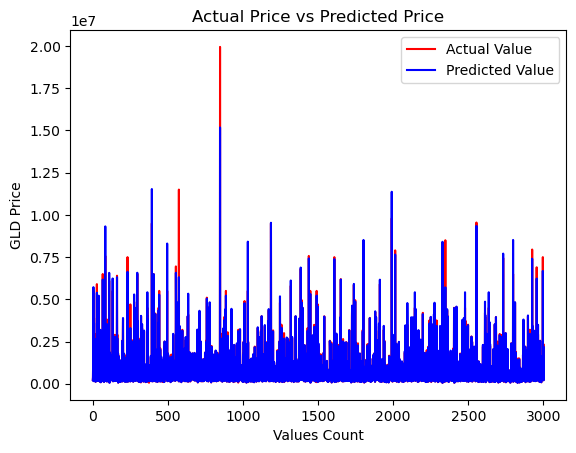

In [53]:
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(y_test_pred, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Values Count')
plt.ylabel('Price')
plt.legend()
plt.show()

## 5. XGBoost

### 5.1 Entrenamiento del modelo

In [34]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 5.2 Evaluación sobre train

In [35]:
# Model prediction on train df
y_pred = reg.predict(X_train)

In [36]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9998653531074524
MAE: 9193.629531500937
MSE: 187820282.15482768
RMSE: 13704.75399833312


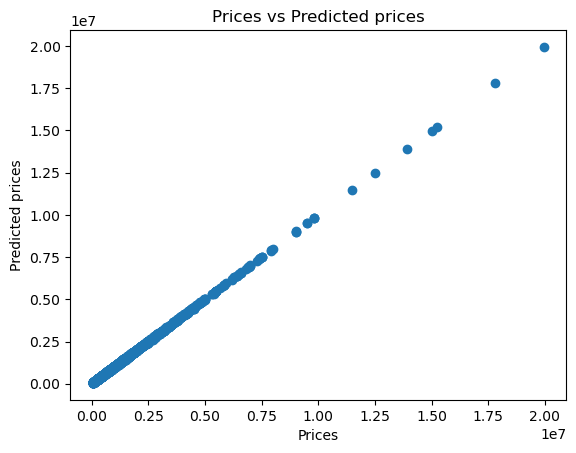

In [37]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

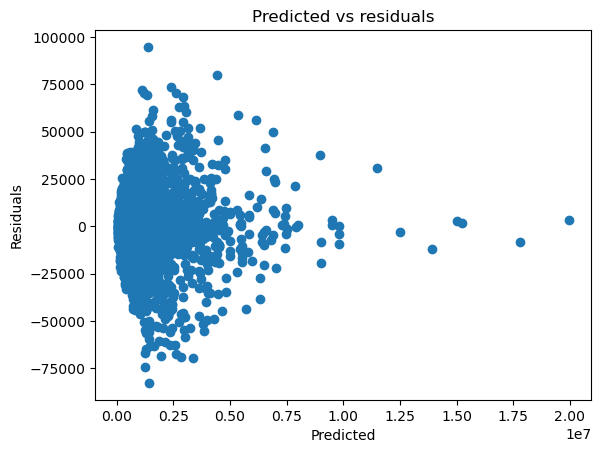

In [38]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### 5.3 Evaluación sobre validación

In [39]:
# Model prediction on train df
y_predval = reg.predict(X_val)

In [40]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_val, y_predval))
print('MAE:',metrics.mean_absolute_error(y_val, y_predval))
print('MSE:',metrics.mean_squared_error(y_val, y_predval))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

R^2: 0.9868069291114807
MAE: 30923.076860065976
MSE: 14869468081.956608
RMSE: 121940.42841468373


#### 5.3 Evaluación sobre test

In [41]:
# Predicting Test df with the model
y_test_pred = reg.predict(X_test)

In [42]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9689019322395325
MAE: 41389.201102283136
MSE: 42120192988.09574
RMSE: 205232.0466888535


### 6.2 Evaluación sobre train

# 7. Evaluación y comparación de modelos

df_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
df_performance.sort_values(by='R-squared Score', ascending=False)

In [50]:
df_performance = pd.DataFrame({
    'Model': [ 'Random Forest', 'XGBoost'],
    'R-squared Score': [ acc_rf*100, acc_xgb*100]})
df_performance.sort_values(by='R-squared Score', ascending=False)

Model  R-squared Score
0  Random Forest            98.31
1        XGBoost            96.89